# 결정트리 모델

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11 )

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [3]:
#학습한 결과로 트리를 생성
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)

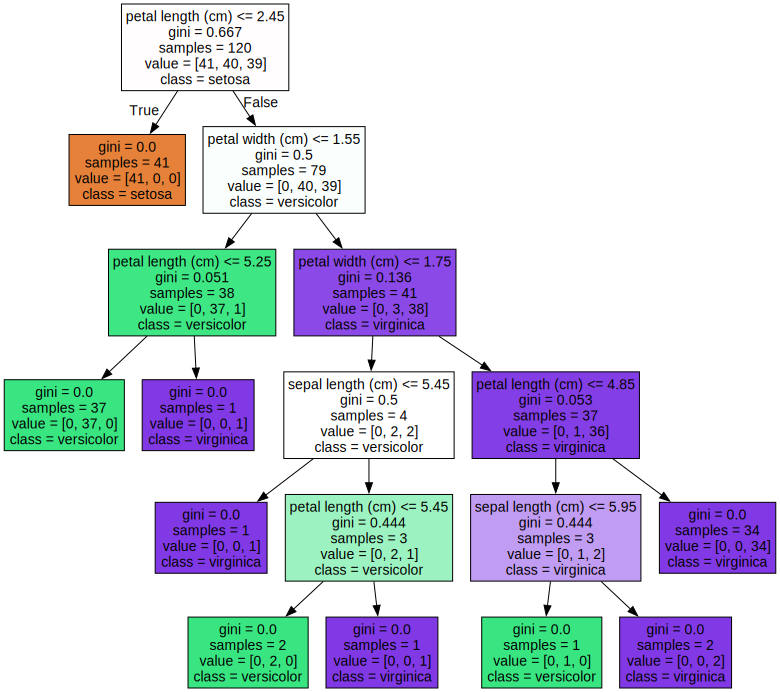

In [4]:
#학습한 결과 트리 시각화
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

# 모델의 평가

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pred = dt_clf.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred, target_names=iris.target_names))

0.9333333333333333
[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [9]:
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [ ]:
# 중요도 시각화 p197

# 하이퍼파라미터 튜닝

In [10]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2,4,6,8,10],
    'min_samples_split' : [2,5,10,20],
    'min_samples_leaf': [1,2,4,8]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=11),
             param_grid=params,
             scoring='accuracy',
             cv=5,
             verbose=1
             )

grid_search.fit(X_train, y_train)

grid_search.best_params_, grid_search.best_score_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


({'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}, 0.95)

In [11]:
best_model = grid_search.best_estimator_

best_pred = best_model.predict(X_test)

accuracy_score(y_test, best_pred)

0.8666666666666667

0.95 > 훈련데이터 검증 정확도 > 테스트 데이터 예측 0.86 > 과적합

# 보팅분류기

In [12]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [14]:
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN', knn_clf)],
                 voting='soft' #mean
                 )

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, test_size=0.2, random_state=0 )

In [15]:
vo_clf.fit(X_train,y_train )
pred = vo_clf.predict(X_test)
accuracy_score(y_test, pred)

0.956140350877193

In [16]:
# 개별 분류기의 예측 성능 - LR, KNN
lr_clf_1 = LogisticRegression(solver='liblinear')
lr_clf_1.fit(X_train,y_train )
pred = lr_clf_1.predict(X_test)
accuracy_score(y_test, pred)

0.956140350877193

In [19]:
# 개별 분류기의 예측 성능 - LR, KNN
knn_clf_1 = KNeighborsClassifier(n_neighbors=8)
knn_clf_1.fit(X_train,y_train )
pred = knn_clf_1.predict(X_test)
accuracy_score(y_test, pred)

0.9473684210526315

# Human activity recognition data set

In [2]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [ ]:
# feature_name_df = pd.read_csv('./UCI HAR Dataset/features.txt', sep='\s+' ,
#                               header=None, names=['column_index', 'column_nam'])

# new_feature_name_df = get_new_feature_name_df(feature_name_df)

# X_train = pd.read_csv('./UCI HAR Dataset/train/X_train.txt')
# X_test =  pd.read_csv('./UCI HAR Dataset/test/X_test.txt')

In [3]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./UCI HAR Dataset/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./UCI HAR Dataset/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./UCI HAR Dataset/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./UCI HAR Dataset/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

#중복컬럼이름 정리

In [22]:
X_train, X_test, y_train, y_test = get_human_dataset()

C:\Users\ylee\AppData\Local\Temp\ipykernel_2740\4103130684.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[1] >0 else x[0] ,  axis=1)
C:\Users\ylee\AppData\Local\Temp\ipykernel_2740\4103130684.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])


# 랜덤 포레스트

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy_score(y_test, pred)

c:\Users\ylee\anaconda3\envs\ml_env\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9219545300305395

In [25]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [8,16,24],
    'min_samples_split' : [2,8,16],
    'min_samples_leaf': [1,6,12]
}

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)



c:\Users\ylee\anaconda3\envs\ml_env\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [8, 16, 24],
                         'min_samples_leaf': [1, 6, 12],
                         'min_samples_split': [2, 8, 16]})

In [26]:
grid_cv.best_params_, grid_cv.best_score_


({'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 16},
 0.9156692056583242)

In [27]:
best_model = grid_cv.best_estimator_

best_pred = best_model.predict(X_test)

accuracy_score(y_test, best_pred)
#accuracy_score(y_test, pred)

0.9209365456396336

In [ ]:
best_model.feature_importances_

In [ ]:
# 피처 중요도 출력

In [29]:
rf_clf_1 = RandomForestClassifier(max_depth=16, min_samples_leaf=6, min_samples_split=16,
                       n_jobs=-1, random_state=0)

rf_clf_1.fit(X_train, y_train)
pred_1 = rf_clf_1.predict(X_test)
accuracy_score(y_test, pred_1)

c:\Users\ylee\anaconda3\envs\ml_env\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9209365456396336

# Gradient Boosting Machine GBM

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
import time

X_train, X_test, y_train, y_test = get_human_dataset()

start_time = time.time() #수행시간 측정

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)

print(accuracy_score(y_test, gb_pred))
print(f'GBM 수행시간 : {time.time()-start_time}')



C:\Users\ylee\AppData\Local\Temp\ipykernel_2740\4103130684.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[1] >0 else x[0] ,  axis=1)
C:\Users\ylee\AppData\Local\Temp\ipykernel_2740\4103130684.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
c:\Users\ylee\anaconda3\envs\ml_env\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

0.9375636240244316
GBM 수행시간 : 632.4530611038208


# p200 결정트리 - 사용자행동인식 데이터

In [5]:
%%time
X_train, X_test, y_train, y_test = get_human_dataset()
X_train.info()


C:\Users\ylee\AppData\Local\Temp\ipykernel_1440\4103130684.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[1] >0 else x[0] ,  axis=1)
C:\Users\ylee\AppData\Local\Temp\ipykernel_1440\4103130684.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
CPU times: total: 3.22 s
Wall time: 3.27 s


In [6]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   action  7352 non-null   int64
dtypes: int64(1)
memory usage: 57.6 KB


In [7]:
y_train.value_counts()

action
6         1407
5         1374
4         1286
1         1226
2         1073
3          986
Name: count, dtype: int64

In [9]:
%%time
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

accuracy_score(y_test, pred)

CPU times: total: 4.06 s
Wall time: 4.06 s


0.8547675602307431

In [10]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 156,
 'splitter': 'best'}

In [13]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24],
    'min_samples_split' : [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
0.8548794147162603
{'max_depth': 8, 'min_samples_split': 16}


In [14]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.604148,0.014379,0.007508,0.000775,6,16,"{'max_depth': 6, 'min_samples_split': 16}",0.813732,0.868117,0.819728,0.866667,0.870068,0.847662,0.025350,5
1,2.020699,0.034739,0.007006,0.000633,8,16,"{'max_depth': 8, 'min_samples_split': 16}",0.806254,0.830048,0.860544,0.874830,0.902721,0.854879,0.033764,1
2,2.384897,0.077305,0.007076,0.001468,10,16,"{'max_depth': 10, 'min_samples_split': 16}",0.804895,0.816451,0.866667,0.884354,0.891156,0.852705,0.035427,2
3,2.691293,0.125851,0.006806,0.000750,12,16,"{'max_depth': 12, 'min_samples_split': 16}",0.798097,0.810333,0.851020,0.884354,0.885034,0.845768,0.036295,7
4,2.986957,0.224720,0.007207,0.001471,16,16,"{'max_depth': 16, 'min_samples_split': 16}",0.800816,0.815092,0.858503,0.876871,0.884354,0.847127,0.033379,6


## 하이퍼파라미터 별 학습 성능

In [16]:
cv_results_df[['rank_test_score','param_max_depth','mean_test_score' ]]

,rank_test_score,param_max_depth,mean_test_score
0,5,6,0.847662
1,1,8,0.854879
2,2,10,0.852705
3,7,12,0.845768
4,6,16,0.847127
5,3,20,0.848624
6,3,24,0.848624


# 테스트 예측 성능

In [18]:
# params = {
#     'max_depth' : [6,8,10,12,16,20,24],
#     'min_samples_split' : [16]
# }

grid_cv.cv_results_['params']

[{'max_depth': 6, 'min_samples_split': 16},
 {'max_depth': 8, 'min_samples_split': 16},
 {'max_depth': 10, 'min_samples_split': 16},
 {'max_depth': 12, 'min_samples_split': 16},
 {'max_depth': 16, 'min_samples_split': 16},
 {'max_depth': 20, 'min_samples_split': 16},
 {'max_depth': 24, 'min_samples_split': 16}]

In [20]:
test_scores = []

for params in grid_cv.cv_results_['params']:
    dt_model = DecisionTreeClassifier(**params)
    dt_model.fit(X_train, y_train)
    test_scores.append((params,dt_model.score(X_test, y_test)))

test_scores


[({'max_depth': 6, 'min_samples_split': 16}, 0.8561248727519511),
 ({'max_depth': 8, 'min_samples_split': 16}, 0.8720732948761453),
 ({'max_depth': 10, 'min_samples_split': 16}, 0.8686800135731252),
 ({'max_depth': 12, 'min_samples_split': 16}, 0.8642687478791992),
 ({'max_depth': 16, 'min_samples_split': 16}, 0.8612147947064812),
 ({'max_depth': 20, 'min_samples_split': 16}, 0.8632507634882932),
 ({'max_depth': 24, 'min_samples_split': 16}, 0.8578215134034611)]